1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm


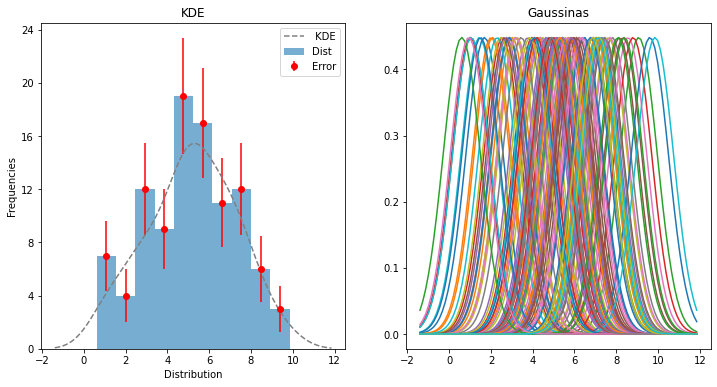

In [38]:
%matplotlib inline
mean = 5;std = 2;N = 100
x = np.random.normal(mean, std, N)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
n_bins = 10
height, edges, bins = ax1.hist(x, bins = n_bins, label='Dist' , alpha=0.6)
ax1.set_ylabel("Frequencies")
ax1.set_xlabel("Distribution")
ax1.set_title('KDE')
ax1.yaxis.set_major_locator(MultipleLocator(N//25))
central_points = 0.5*(edges[1:] + edges[:-1])
ax1.errorbar(central_points, height,np.sqrt(height) , fmt='or', label = "Error", color="red")
ax1.legend()
std_gauss = 1.06 * x.std() * x.size**(-0.2)
pdf = []
for i in x:
    ls = np.linspace(x.min()-2, x.max()+2, N)
    gauss = norm(i, std_gauss)
    pdf.append(gauss.pdf(ls))
    ax2.plot(ls, pdf[-1])
ax2.set_title('Gaussinas')
gauss_norm= np.sum(pdf, axis=0)/N*(sp.integrate.trapz(height, x = edges[1:])) 
ax1.plot(ls, gauss_norm, '--',color='grey',label=' KDE')
ax1.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


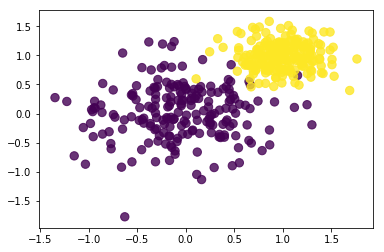

In [4]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

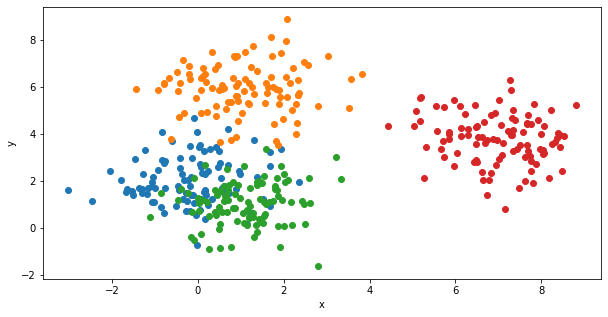

In [45]:
n = 4;a = np.arange(100)
fig, ax = plt.subplots(figsize=(10, 5))
mean = np.array([])
cov = mean
for i in range(n):
    mu, sigma = np.random.randint(8), 1 # mean & sigma for category one
    x = np.random.normal(mu,sigma,N) # first category
    mu, sigma = np.random.randint(8), 1 # mean & sigma for category two
    y = np.random.normal(mu,sigma,N) # second category

    ax.scatter(x=x, y=y, marker='o')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


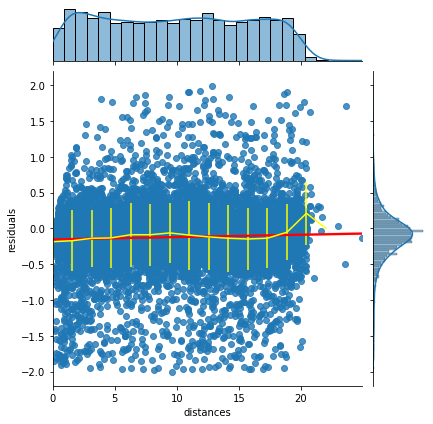

In [15]:
import seaborn as sb
data = pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
data = data[abs(data['residuals'])< 2]
linregres = sp.stats.linregress(data['distances'], data['residuals'])
sb.jointplot(data['distances'], data['residuals'], kind="reg", line_kws={'color':'red'})
n_bins = 15
x = np.linspace(0,22, n_bins)
y = np.zeros(n_bins)
erry = np.zeros(len(x))
count = 0
prev = x[0]
for i in range(1, len(x)):
    d_tmp = data[data['distances'] < x[i]]
    d_bin = d_tmp[d_tmp['distances'] >= x[i-1]]
    y[i-1] = d_bin['residuals'].mean()
    erry[i-1] = d_bin['residuals'].std()    
plt.errorbar(x, y, erry, color='yellow')
plt.show()